In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# reading preprocessed data, containing attributes researchers identified as relevant
pdata =  pd.read_csv('processed.hungarian.data')
pdata2 =  pd.read_csv('processed.cleveland.data')
pdata3 =  pd.read_csv('processed.switzerland.data')
pdata4 =  pd.read_csv('processed.va.data')

pdata.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease-likelihood']
pdata2.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease-likelihood']
pdata3.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease-likelihood']
pdata4.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease-likelihood']

merge1=pd.concat([pdata, pdata2])
merge2=pd.concat([merge1, pdata3])
total_processed_data=pd.concat([merge2, pdata4])

# export dataset to be further used
total_processed_data.to_csv('total_processed_data.csv', index = False)

print(total_processed_data)


      age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope ca  \
0    29.0  1.0  2.0      120  243   0       0     160     0     0.0     ?  ?   
1    29.0  1.0  2.0      140    ?   0       0     170     0     0.0     ?  ?   
2    30.0  0.0  1.0      170  237   0       1     170     0     0.0     ?  ?   
3    31.0  0.0  2.0      100  219   0       1     150     0     0.0     ?  ?   
4    32.0  0.0  2.0      105  198   0       0     165     0     0.0     ?  ?   
..    ...  ...  ...      ...  ...  ..     ...     ...   ...     ...   ... ..   
194  54.0  0.0  4.0      127  333   1       1     154     0       0     ?  ?   
195  62.0  1.0  1.0        ?  139   0       1       ?     ?       ?     ?  ?   
196  55.0  1.0  4.0      122  223   1       1     100     0       0     ?  ?   
197  58.0  1.0  4.0        ?  385   1       2       ?     ?       ?     ?  ?   
198  62.0  1.0  2.0      120  254   0       2      93     1       0     ?  ?   

    thal  disease-likelihood  
0      ?

In [2]:
linecount=0
elementCount=0
totalList=[]
tempList=[]
with open("hungarian.data", "r") as f:
    for dataline in f:
        elements=dataline.strip().split(' ')
        for element in elements:
            elementCount+=1
            if(elementCount<69):
                if element!='':
                    tempList.append(float(element))
        linecount+=1
        if linecount==10:
            totalList.append(tempList.copy())
            tempList.clear()
            elementCount=0
            linecount=0
unprocessedDataFrame=pd.DataFrame(totalList, columns=["id", "ccf", "age", "sex", "painloc", "painexer", "relrest", "pncaden", "cp", "trestbps", "htn", "chol", "smoke", "cigs", "years", "fbs", "dm", "famhist", "restecg", "ekgmo", "ekgday", "ekgyr", "dig", "prop", "nitr", "pro", "diuretic", "proto", "thaldur", "thaltime", "met", "thalach", "thalrest", "tpeakbps", "tpeakbpd", "dummy", "trestbpd", "exang", "xhypo", "oldpeak", "slope", "rldv5", "rldv5e", "ca", "restckm", "exerckm", "restef", "restwm", "exeref", "exerwm", "thal", "thalsev", "thalpul", "earlobe", "cmo", "cday", "cyr", "num", "lmt", "ladprox", "laddist", "diag", "cxmain", "ramus", "om1", "om2", "rcaprox", "rcadist"])
print(unprocessedDataFrame)

         id  ccf   age  sex  painloc  painexer  relrest  pncaden   cp  \
0    1254.0  0.0  40.0  1.0      1.0       0.0      0.0     -9.0  2.0   
1    1255.0  0.0  49.0  0.0      1.0       0.0      0.0     -9.0  3.0   
2    1256.0  0.0  37.0  1.0      1.0       0.0      0.0     -9.0  2.0   
3    1257.0  0.0  48.0  0.0      1.0       1.0      1.0     -9.0  4.0   
4    1258.0  0.0  54.0  1.0      1.0       0.0      1.0     -9.0  3.0   
..      ...  ...   ...  ...      ...       ...      ...      ...  ...   
289  1053.0  0.0  48.0  0.0      0.0       0.0      0.0     -9.0  2.0   
290  1054.0  0.0  36.0  1.0      1.0       0.0      0.0     -9.0  2.0   
291  5001.0  0.0  48.0  1.0      0.0       0.0      0.0     -9.0  3.0   
292  5000.0  0.0  47.0  0.0      0.0       0.0      0.0     -9.0  2.0   
293  5002.0  0.0  53.0  1.0      1.0       1.0      1.0     -9.0  4.0   

     trestbps  ...  lmt  ladprox  laddist  diag  cxmain  ramus  om1  om2  \
0       140.0  ... -9.0     -9.0     -9.0  -9.0

In [3]:
X = total_processed_data.drop('disease-likelihood', axis = 1)
y = total_processed_data['disease-likelihood']

print(len(X.index))
data_train, data_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(data_train)
print(y_train)

916
      age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
167  35.0  1.0  4.0    126.0  282.0  0.0     2.0   156.0   1.0     0.0   1.0   
237  49.0  0.0  2.0    134.0  271.0  0.0     0.0   162.0   0.0     0.0   2.0   
92   58.0  1.0  4.0      110    198    0       0     110     0       0     ?   
216  46.0  0.0  4.0    138.0  243.0  0.0     2.0   152.0   1.0     0.0   2.0   
32   55.0  1.0  3.0        0      0    0       0     155     0     1.5     2   
..    ...  ...  ...      ...    ...  ...     ...     ...   ...     ...   ...   
248  62.0  1.0  2.0    128.0  208.0  1.0     2.0   140.0   0.0     0.0   1.0   
49   55.0  1.0  3.0      120      0    0       1     125     1     2.5     2   
147  57.0  1.0  4.0      144    270    1       1     160     1       2     2   
107  65.0  1.0  4.0      145      0    ?       1      67     0       ?     ?   
16   46.0  1.0  4.0      110    236    0       0     125     1       2     2   

      ca thal  
167  0.0  7.0  
237

In [4]:
#Currently being worked on



In [5]:
# before working on the dataset, replace string '?' with NaN
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_csv('total_processed_data.csv')

# relace '?'
df.replace('?', np.nan, inplace=True)

# check
print(df)


      age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope  \
0    29.0  1.0  2.0      120  243   0       0     160     0     0.0   NaN   
1    29.0  1.0  2.0      140  NaN   0       0     170     0     0.0   NaN   
2    30.0  0.0  1.0      170  237   0       1     170     0     0.0   NaN   
3    31.0  0.0  2.0      100  219   0       1     150     0     0.0   NaN   
4    32.0  0.0  2.0      105  198   0       0     165     0     0.0   NaN   
..    ...  ...  ...      ...  ...  ..     ...     ...   ...     ...   ...   
911  54.0  0.0  4.0      127  333   1       1     154     0       0   NaN   
912  62.0  1.0  1.0      NaN  139   0       1     NaN   NaN     NaN   NaN   
913  55.0  1.0  4.0      122  223   1       1     100     0       0   NaN   
914  58.0  1.0  4.0      NaN  385   1       2     NaN   NaN     NaN   NaN   
915  62.0  1.0  2.0      120  254   0       2      93     1       0   NaN   

      ca thal  disease-likelihood  
0    NaN  NaN                   0  
1  

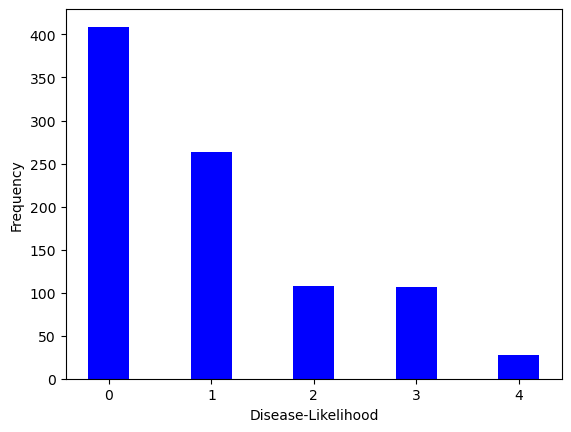

In [6]:
zero_count=len(df[df['disease-likelihood']==0])
one_count=len(df[df['disease-likelihood']==1])
two_count=len(df[df['disease-likelihood']==2])
three_count=len(df[df['disease-likelihood']==3])
four_count=len(df[df['disease-likelihood']==4])

labels=[0,1,2,3,4]
heights=[zero_count,one_count,two_count,three_count,four_count]
plt.bar(labels, heights, color='blue', width=.4)
plt.xlabel("Disease-Likelihood")
plt.ylabel('Frequency')
plt.show()

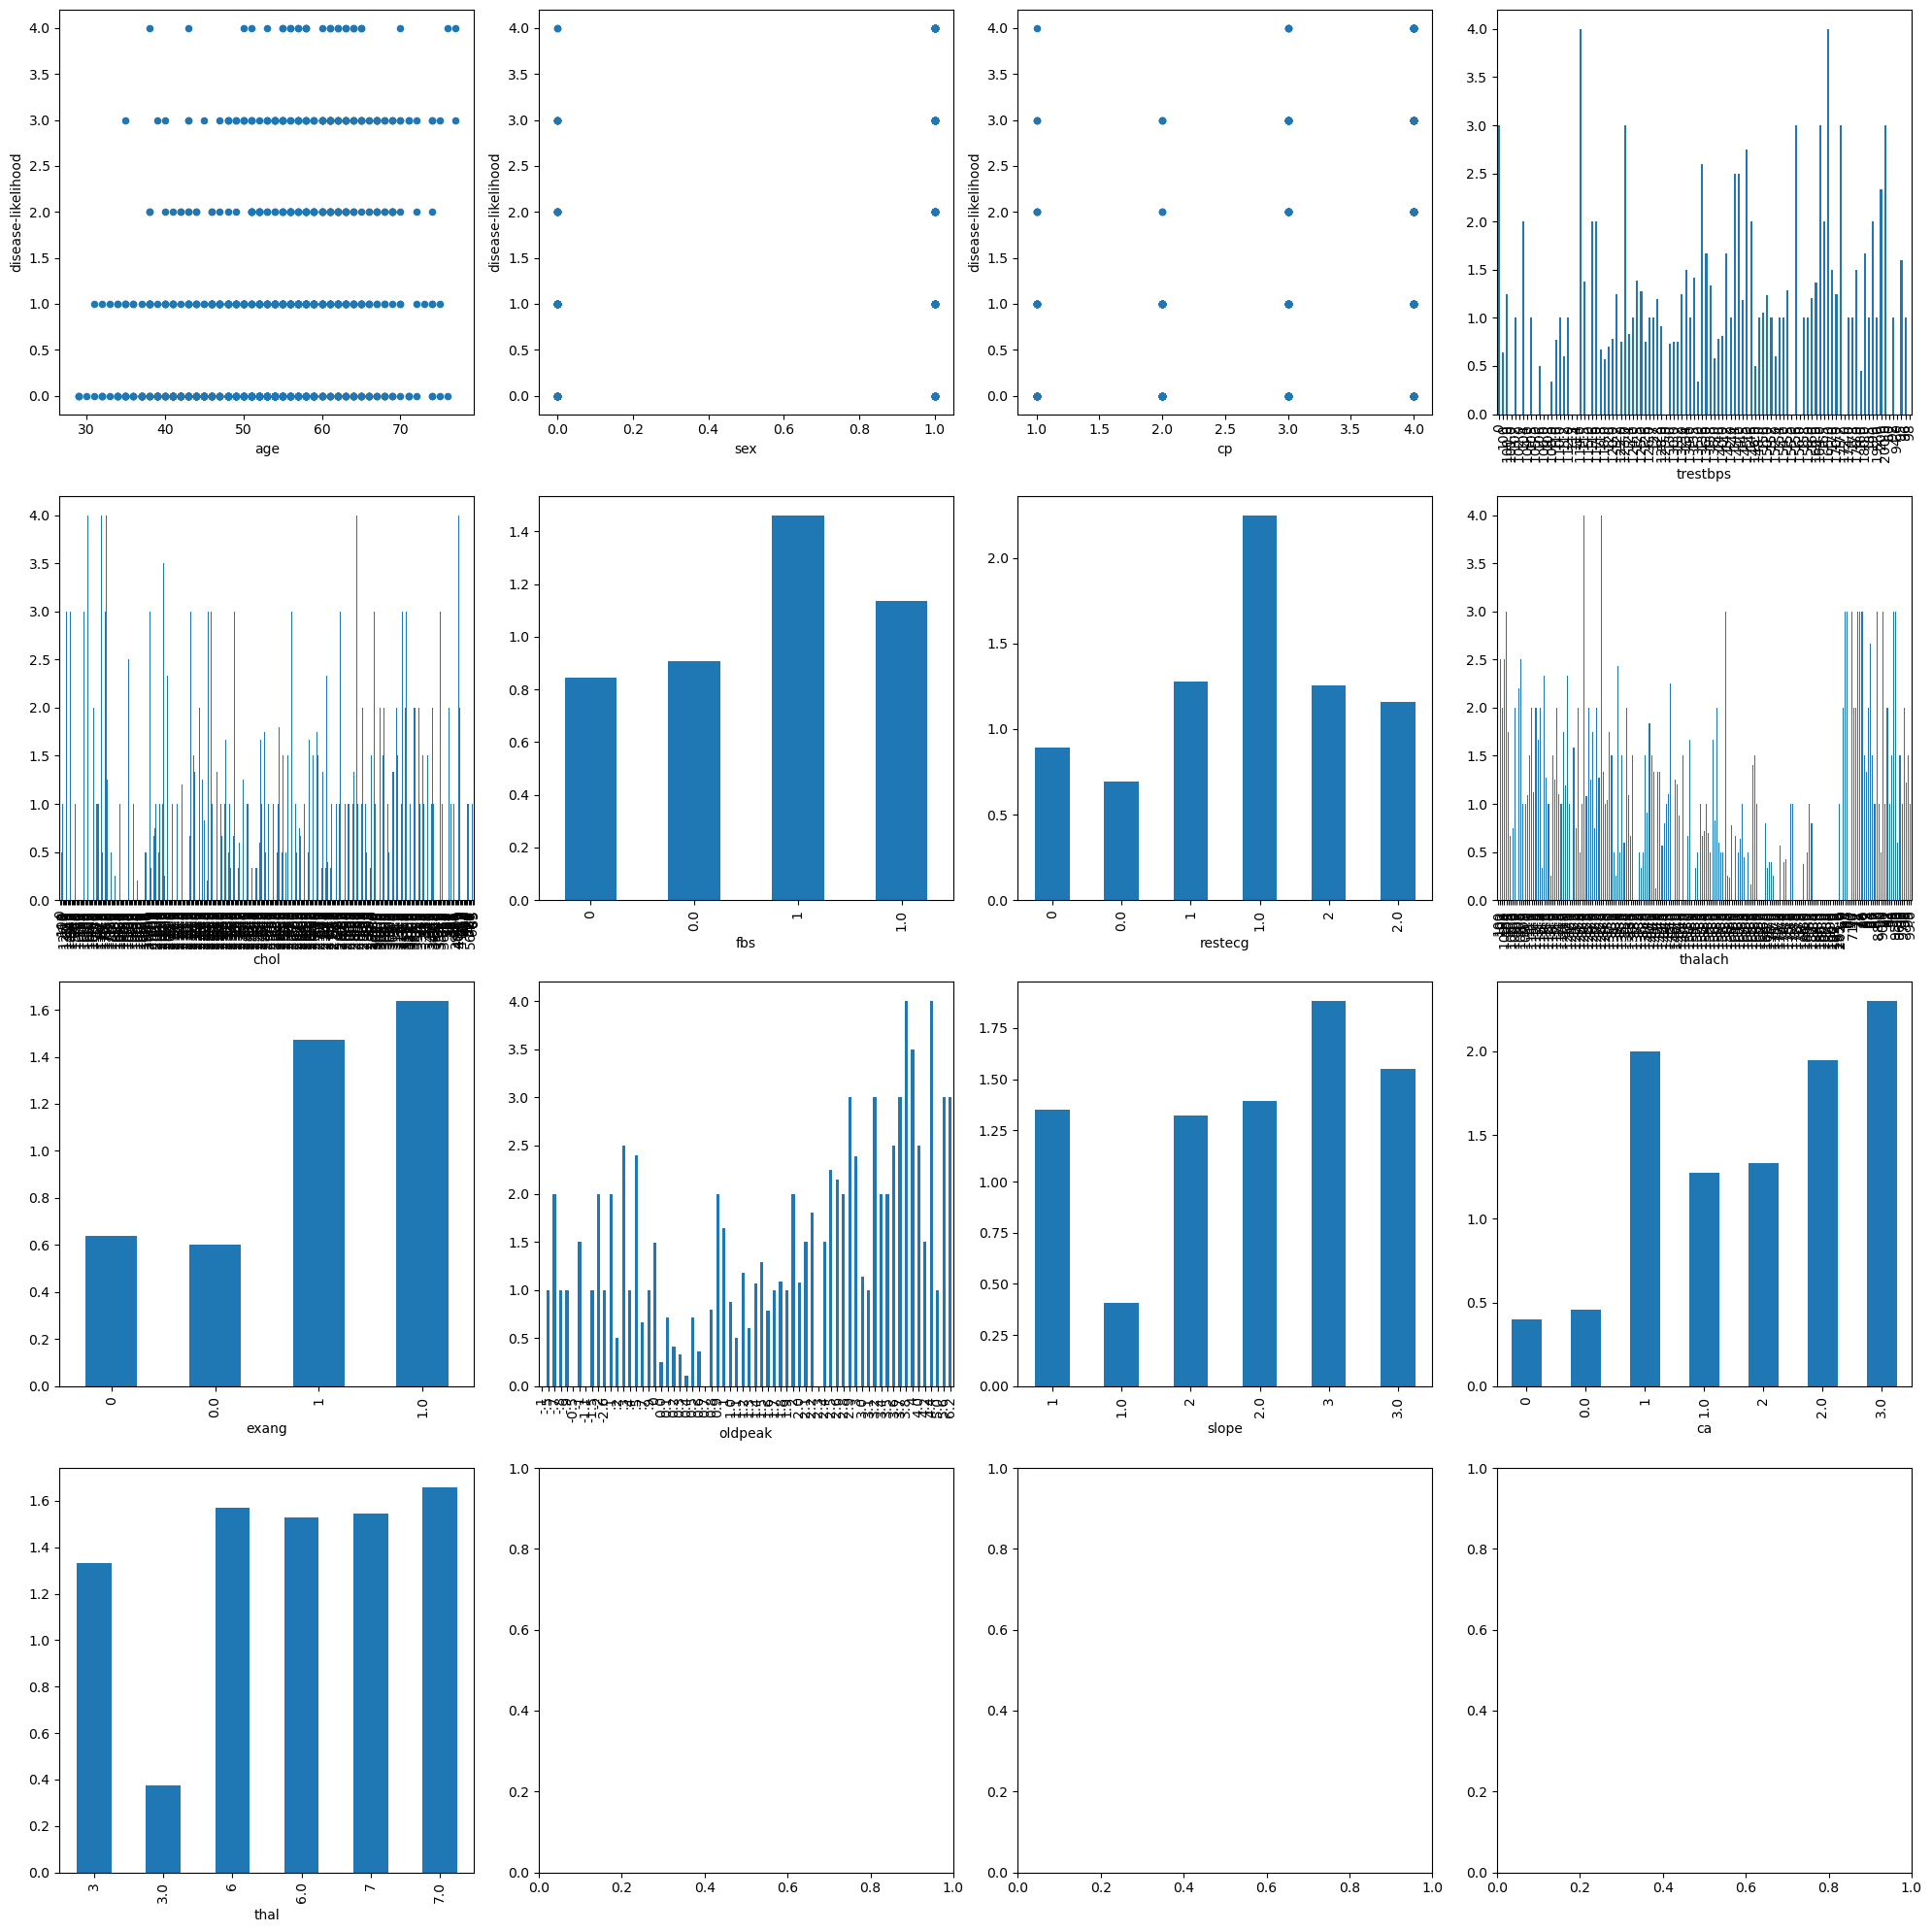

In [7]:
# visualize the relation between each independent to disease-likelihood

# Create a bar chart for each independent variable
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axs = axs.flatten()

for i, col in enumerate(df.columns[:-1]):
    if df[col].dtype == 'object':
        df.groupby(col)['disease-likelihood'].mean().plot(kind='bar', ax=axs[i])
    else:
        df.plot.scatter(x=col, y='disease-likelihood', ax=axs[i])


plt.tight_layout()
plt.show()

In [6]:
pip install flask

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 KB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 7.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
# linear regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

# Load data and fill missing values with 0
df2 = df.fillna(0.5)

# Define the features (independent variables)
X = df2.drop('disease-likelihood', axis = 1)

# Define the target variable (dependent variable)
y = df2['disease-likelihood']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Print the feature importances
for i, col in enumerate(X_train.columns):
    print(f"Feature: {col}, Importance: {importances[i]}")

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(rf, open('model.pkl','wb'))

# Calculate the testing MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Testing MSE: {mse}")

Feature: age, Importance: 0.1315422432639121
Feature: sex, Importance: 0.013915839560513697
Feature: cp, Importance: 0.14083810875922284
Feature: trestbps, Importance: 0.07389285098318812
Feature: chol, Importance: 0.12943266368324605
Feature: fbs, Importance: 0.025330273914426903
Feature: restecg, Importance: 0.026287690449250552
Feature: thalach, Importance: 0.10365805874960399
Feature: exang, Importance: 0.06009731781394595
Feature: oldpeak, Importance: 0.15714838867471378
Feature: slope, Importance: 0.029681547985226077
Feature: ca, Importance: 0.05680824505564484
Feature: thal, Importance: 0.0513667711071052
Testing MSE: 0.736433695652174


In [8]:
# linear regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

# Load data and drop rows with missing values
df3 = df.dropna()

# Define the features (independent variables)
X = df3.drop('disease-likelihood', axis = 1)

# Define the target variable (dependent variable)
y = df3['disease-likelihood']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Print the feature importances
for i, col in enumerate(X_train.columns):
    print(f"Feature: {col}, Importance: {importances[i]}")

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(rf, open('model.pkl','wb'))

# Calculate the testing MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Testing MSE: {mse}")

Feature: age, Importance: 0.05785565186604762
Feature: sex, Importance: 0.018151122608991228
Feature: cp, Importance: 0.13774321095143563
Feature: trestbps, Importance: 0.06609617319076264
Feature: chol, Importance: 0.07080168437326281
Feature: fbs, Importance: 0.0064102504399259
Feature: restecg, Importance: 0.014366339991199443
Feature: thalach, Importance: 0.1136244283789954
Feature: exang, Importance: 0.022368751704588147
Feature: oldpeak, Importance: 0.14178350134494686
Feature: slope, Importance: 0.020833616025391015
Feature: ca, Importance: 0.21646409694000238
Feature: thal, Importance: 0.11350117218445102
Testing MSE: 0.8169833333333333


In [10]:
# linear regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

# Load data and drop rows with missing values
df4 = df.fillna(0)

# Define the features (independent variables)
X = df4.drop('disease-likelihood', axis = 1)

# Define the target variable (dependent variable)
y = df4['disease-likelihood']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Print the feature importances
for i, col in enumerate(X_train.columns):
    print(f"Feature: {col}, Importance: {importances[i]}")

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(rf, open('model.pkl','wb'))

# Calculate the testing MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Testing MSE: {mse}")

Feature: age, Importance: 0.14059702147771105
Feature: sex, Importance: 0.018780721527862303
Feature: cp, Importance: 0.1576468911572207
Feature: trestbps, Importance: 0.08398445719672053
Feature: chol, Importance: 0.10579685398782217
Feature: fbs, Importance: 0.01799979014458514
Feature: restecg, Importance: 0.026608132707969242
Feature: thalach, Importance: 0.13639914254773017
Feature: exang, Importance: 0.030158903697861415
Feature: oldpeak, Importance: 0.1575046765888188
Feature: slope, Importance: 0.032073806791552355
Feature: ca, Importance: 0.04186961478175254
Feature: thal, Importance: 0.05057998739239361
Testing MSE: 0.8096086956521739


In [11]:
# linear regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

# Load data and drop rows with missing values
df4 = df.fillna(1)

# Define the features (independent variables)
X = df4.drop('disease-likelihood', axis = 1)

# Define the target variable (dependent variable)
y = df4['disease-likelihood']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Print the feature importances
for i, col in enumerate(X_train.columns):
    print(f"Feature: {col}, Importance: {importances[i]}")

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(rf, open('model.pkl','wb'))

# Calculate the testing MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Testing MSE: {mse}")

Feature: age, Importance: 0.1320559327334631
Feature: sex, Importance: 0.014327001122855593
Feature: cp, Importance: 0.13636288732545312
Feature: trestbps, Importance: 0.07863595223376442
Feature: chol, Importance: 0.1346822297994558
Feature: fbs, Importance: 0.021565351979540192
Feature: restecg, Importance: 0.02702455012881736
Feature: thalach, Importance: 0.10756309938277567
Feature: exang, Importance: 0.05275148372799303
Feature: oldpeak, Importance: 0.17316640398275013
Feature: slope, Importance: 0.023110778346183185
Feature: ca, Importance: 0.03867140043420857
Feature: thal, Importance: 0.06008292880273999
Testing MSE: 0.7460586956521739


In [12]:
from flask import Flask, request, render_template
import pickle

app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))  # loading the model

@app.route('/')
def home():
    return render_template('heart_disease.html')
  
@app.route('/predict',methods=['POST'])
def predict():
    """Grabs the input values and uses them to make prediction"""
    age = int(request.form["Age"])
    sex = int(request.form["Sex"])
    cp = int(request.form["cp"])
    trestbps = int(request.form["trestbps"])
    chol = int(request.form["chol"])
    fbs = int(request.form["fbs"])
    restecg = int(request.form["restecg"])
    thalach = int(request.form["thalach"])
    exang = int(request.form["exang"])
    oldpeak = int(request.form["oldpeak"])
    slope = int(request.form["slope"])
    ca = int(request.form["ca"])
    thal = int(request.form["thal"])

    prediction = model.predict([[age, sex, cp, trestbps, 
                                 chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])  # this returns a list e.g. [127.20488798], so pick first element [0]
    output = round(prediction[0], 2) 

    return render_template('heart_disease.html', prediction_text=f'The chance of heart disease is: ${output}')

if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
On macOS, try disabling the 'AirPlay Receiver' service from System Preferences -> Sharing.


AssertionError: 

In [19]:
# Feed Forward
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Load data and drop rows with missing values
df = df.fillna(0.5)

# Define the features (independent variables)
X = df.drop('disease-likelihood', axis = 1)

# Define the target variable (dependent variable)
y = df['disease-likelihood']

# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

#splitting data into ratio 90:10
data_train, data_test, class_train_1, class_test_1 = train_test_split(X, y, test_size=0.1)

mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.2, batch_size = 256, hidden_layer_sizes = (10, 15), max_iter = 500, verbose = False)

mlp.fit(data_train, class_train_1)

pred_1 = mlp.predict(data_test)

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, r2_score

print("Accuracy : ", accuracy_score(class_test_1, pred_1))
print("MSE : ", mean_squared_error(class_test_1, pred_1))

# Display variable importance
coefficients = mlp.coefs_[0]
for i in range(X.shape[1]):
    print(f"{X.columns[i]}: {coefficients[i].mean()}")


Accuracy :  0.5434782608695652
MSE :  1.391304347826087
age: 0.2490846482429113
sex: -0.19260203840921158
cp: -0.3957166239398971
trestbps: -0.2348183597868852
chol: -0.16989714217737373
fbs: -0.07978104215624182
restecg: 0.2022872473157475
thalach: -0.03449118148106041
exang: -0.19884095770174331
oldpeak: 0.03826541041292464
slope: -0.24733788971321297
ca: -0.02927953185398722
thal: -0.07011895698646578


In [24]:
# Feed Forward with fewer Attributes
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Load data and drop rows with missing values
df = df.fillna(0.5)

# Define the features (independent variables)
X = df.drop(columns=['disease-likelihood','slope', 'ca', 'thal'], axis = 1)

# Define the target variable (dependent variable)
y = df['disease-likelihood']

# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

#splitting data into ratio 90:10
data_train, data_test, class_train_2, class_test_2 = train_test_split(X, y, test_size=0.1)

mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.2, batch_size = 256, hidden_layer_sizes = (10, 15), max_iter = 500, verbose = False)

mlp.fit(data_train, class_train_2)

pred_2 = mlp.predict(data_test)

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, r2_score

print("Accuracy : ", accuracy_score(class_test_2, pred_2))
print("MSE : ", mean_squared_error(class_test_2, pred_2))

# Display variable importance
coefficients = mlp.coefs_[0]
for i in range(X.shape[1]):
    print(f"{X.columns[i]}: {coefficients[i].mean()}")

print(df.columns)


Accuracy :  0.5978260869565217
MSE :  1.1521739130434783
age: 0.14067525807288705
sex: 0.0654929694234768
cp: -0.16749081666924445
trestbps: -0.008698871022268318
chol: 0.015948635414017705
fbs: 0.1102646711690439
restecg: 0.05632273365512375
thalach: -0.01774296283642408
exang: 0.10309192832050451
oldpeak: -0.12668219546187934
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease-likelihood'],
      dtype='object')


In [21]:

unprocessedData=unprocessedDataFrame[['age', 'sex', 'cp', 'trestbps', 'chol', 'smoke', 'fbs','dm', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']]


In [22]:
#Feed Forward with more Attributes
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Load data and drop rows with missing values
unprocessedData = unprocessedData.fillna(0.5)

# Define the features (independent variables)
X = unprocessedData.drop(columns=['num'], axis = 1)

# Define the target variable (dependent variable)
y = unprocessedData['num']

# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

#splitting data into ratio 90:10
data_train, data_test, class_train_3, class_test_3 = train_test_split(X, y, test_size=0.1)

mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.2, batch_size = 256, hidden_layer_sizes = (10, 15), max_iter = 500, verbose = False)

mlp.fit(data_train, class_train_3)

pred_3 = mlp.predict(data_test)

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, r2_score

print("Accuracy : ", accuracy_score(class_test_3, pred_3))
print("MSE : ", mean_squared_error(class_test_3, pred_3))

# Display variable importance
coefficients = mlp.coefs_[0]
for i in range(X.shape[1]):
    print(f"{X.columns[i]}: {coefficients[i].mean()}")

Accuracy :  0.6333333333333333
MSE :  1.6666666666666667
age: 0.021428889251445944
sex: -0.02917655956194376
cp: -0.024421893225474636
trestbps: 0.009001351750478528
chol: -0.0431090516680393
smoke: 0.038370207479485316
fbs: -0.0159593094913216
dm: -0.02181188935178253
restecg: 0.011845162372788808
thalach: -0.038826215641851874
exang: -0.042156267216319376
oldpeak: 0.08734001394442945
slope: 0.05516494898842013
ca: -0.007113206271643607
thal: -0.06558400669179769


Classification Report for regular CNN:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        34
           1       0.50      0.57      0.53        37
           2       0.00      0.00      0.00         9
           3       0.25      0.36      0.30        11
           4       0.00      0.00      0.00         1

    accuracy                           0.54        92
   macro avg       0.30      0.33      0.31        92
weighted avg       0.50      0.54      0.52        92



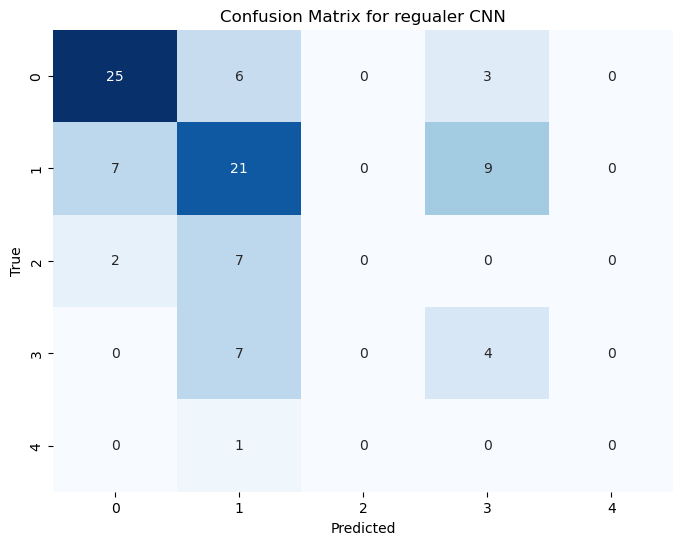

Classification Report for fewer attribute CNN:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78        38
           1       0.54      0.61      0.57        33
           2       0.00      0.00      0.00        11
           3       0.25      0.25      0.25         8
           4       0.00      0.00      0.00         2

    accuracy                           0.60        92
   macro avg       0.30      0.34      0.32        92
weighted avg       0.51      0.60      0.55        92



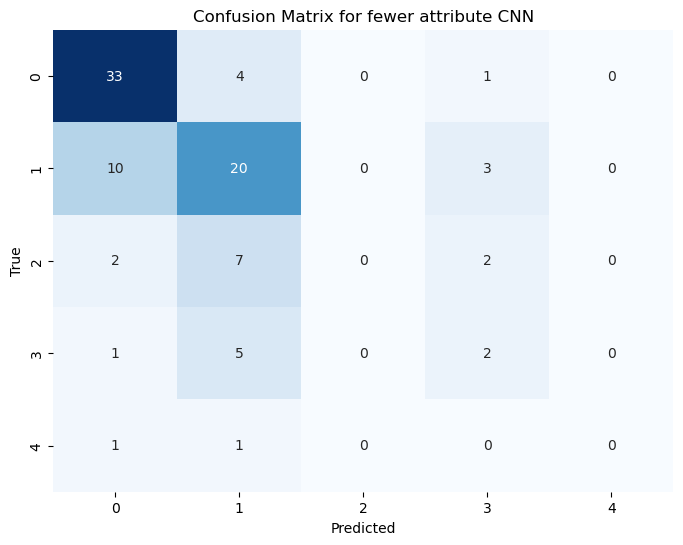

Classification Report for more attribute CNN:
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.78        19
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00         3

    accuracy                           0.63        30
   macro avg       0.16      0.25      0.19        30
weighted avg       0.40      0.63      0.49        30



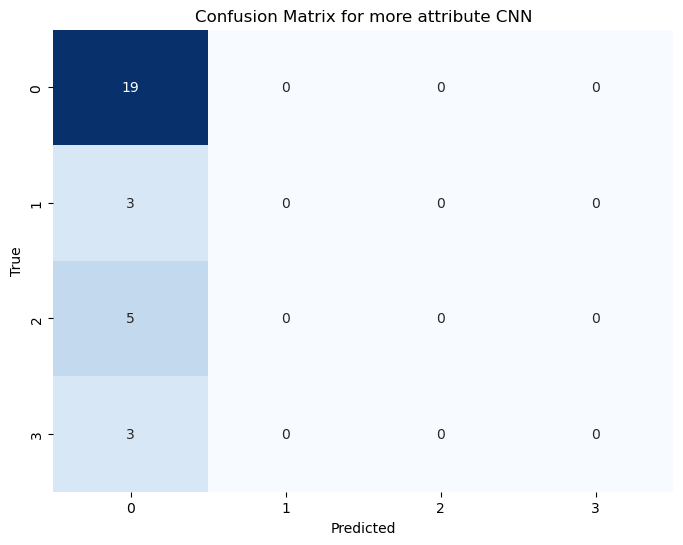

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print("Classification Report for regular CNN:")
print(classification_report(class_test_1, pred_1, zero_division=0))
cm_1 = confusion_matrix(class_test_1, pred_1)


# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for regualer CNN')
plt.show()

print("Classification Report for fewer attribute CNN:")
print(classification_report(class_test_2, pred_2, zero_division=0))
cm_2 = confusion_matrix(class_test_2, pred_2)


# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for fewer attribute CNN')
plt.show()

print("Classification Report for more attribute CNN:")
print(classification_report(class_test_3, pred_3, zero_division=0))
cm_3 = confusion_matrix(class_test_3, pred_3)


# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for more attribute CNN')
plt.show()